# Modelos no supervisados

## KMeans

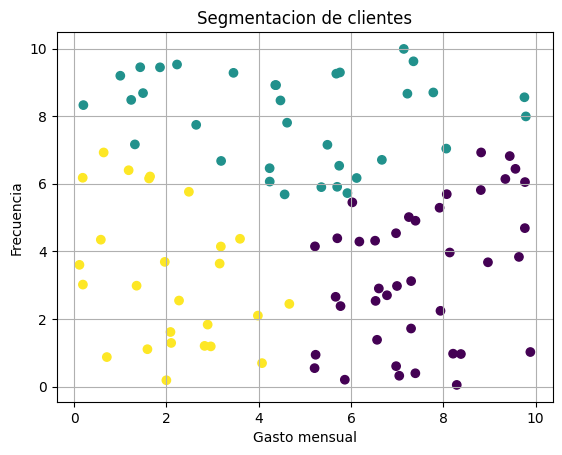

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.random.rand(100, 2) * 10

km = KMeans(n_clusters = 3, random_state = 42)

km.fit(X)

etiquetas = km.labels_
centroides = km.cluster_centers_

plt.scatter(X[:,0], X[:,1], c = etiquetas, cmap = 'viridis')
plt.xlabel('Gasto mensual')
plt.ylabel('Frecuencia')
plt.title('Segmentacion de clientes')
plt.grid()
plt.show()

### Como saber el numero de clusters? Metodo del codo y metodo de la silueta

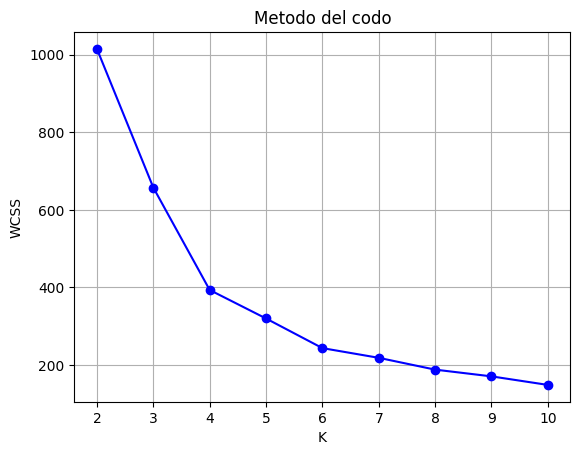

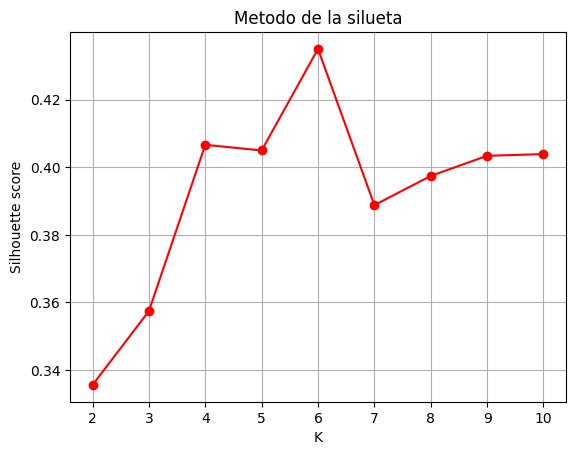

In [ ]:
from sklearn.metrics import silhouette_score

wcss = []
silhouettes_scores = []
k_range = range(2, 11)

for k in k_range:
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(X)
  wcss.append(km.inertia_)
  silhouettes_scores.append(silhouette_score(X, km.labels_))

#Se busca el codo
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Metodo del codo')
plt.grid()
plt.show()

#Se busca maximizar el scoring
plt.plot(k_range, silhouettes_scores, 'ro-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Metodo de la silueta')
plt.grid()
plt.show()

## DBSCAN

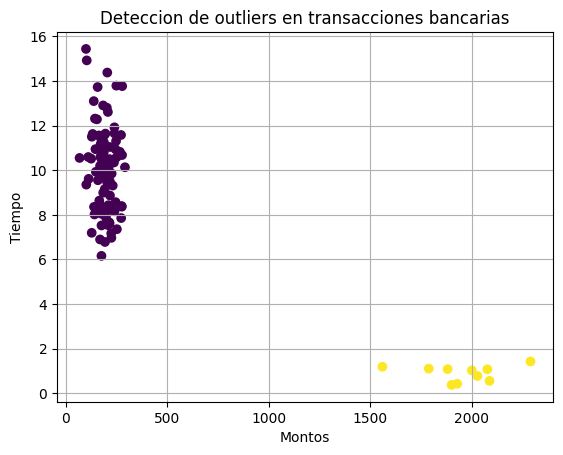


Outliers

          Monto    Tiempo
90  2029.123265  0.776743
91  2290.593497  1.428199
92  1789.384072  1.107047
93  1901.701356  0.377131
94  1882.367554  1.086590
95  1560.945516  1.192659
96  2088.836083  0.558071
97  2078.316582  1.076863
98  2001.534037  1.029104
99  1929.623860  0.428515


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd

np.random.seed(42)

data = {'Monto': np.concat([np.random.normal(200, 50, 90), np.random.normal(2000, 300, 10)]),
        'Tiempo': np.concat([np.random.normal(10, 2, 90), np.random.normal(1, 0.5, 10)])}

df = pd.DataFrame(data)

ss = StandardScaler()
df_scaled = ss.fit_transform(df)

dbscan = DBSCAN(eps = 0.5, min_samples = 5)

etiquetas = dbscan.fit_predict(df_scaled)

plt.scatter(df['Monto'], df['Tiempo'], c = etiquetas, cmap = 'viridis')
plt.xlabel('Montos')
plt.ylabel('Tiempo')
plt.title('Deteccion de outliers en transacciones bancarias')
plt.grid()
plt.show()

outliers = df[etiquetas == 1]
print('\nOutliers\n')
print(outliers)

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-segmentation-tutorial-in-python


In [ ]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'Mall_Customers.csv')

df = pd.read_csv(dataset_path)

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isna().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df2 = df.copy()
df2 = df2.drop(columns = ['CustomerID'])

In [ ]:
df2['Gender'] = df2['Gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [ ]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

X = df2[features].copy()
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [ ]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

X_scaled[:5]

array([[-1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [ 0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [ 0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [ 0.88640526, -0.56336851, -1.66266033, -0.39597992]])

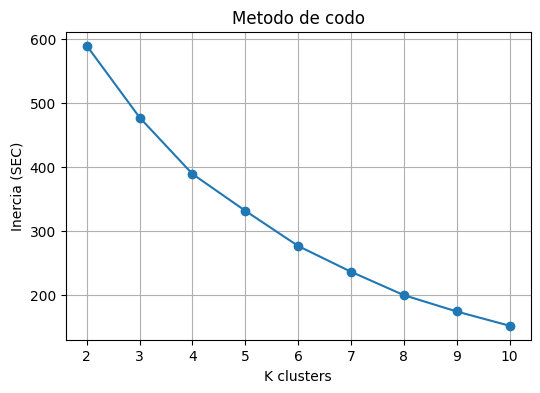

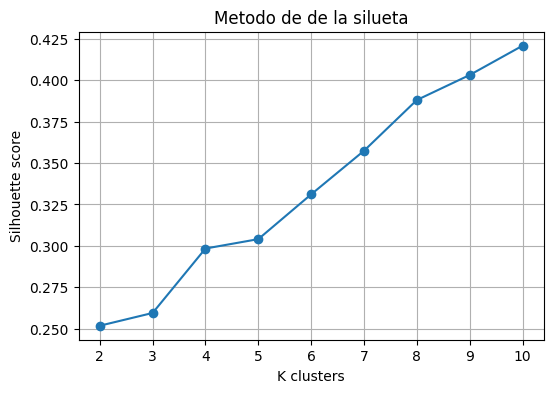

In [ ]:
from ast import arg
inercia = []

ks = range(2, 11)

for k in ks:
  km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
  km.fit(X_scaled)
  inercia.append(km.inertia_)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), inercia, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Inercia (SEC)')
plt.title('Metodo de codo')
plt.grid()
plt.show()

silhouette_scores = []

for k in ks:
  km = KMeans(n_clusters = k, n_init = 10, random_state = 42)
  etiquetas = km.fit_predict(X_scaled)
  sil = silhouette_score(X_scaled, etiquetas)
  silhouette_scores.append(sil)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), silhouette_scores, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Silhouette score')
plt.title('Metodo de de la silueta')
plt.grid()
plt.show()

best_k_sil = ks[int(np.argmax(silhouette_scores))]
best_k_sil, max(silhouette_scores)

#k_optimo = int(best_k_sil)
k_optimo = 4
km = KMeans(n_clusters = k_optimo, random_state = 42, n_init = 10)
etiquetas = km.fit_predict(X_scaled)
df_km = df2.copy()
df_km['Cluster'] = etiquetas
centroides = km.cluster_centers_

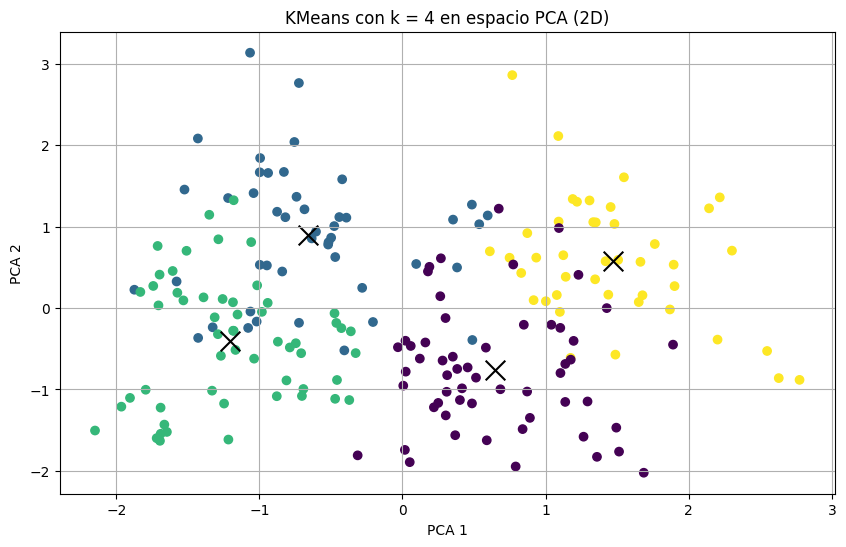

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X_scaled)
centroides_pca = pca.transform(centroides)

plt.figure(figsize = (10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c = etiquetas, cmap = 'viridis')
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = 'x', s = 200, color = 'black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans con k = {k_optimo} en espacio PCA (2D)')
plt.grid()
plt.show()

In [ ]:
perfil = (df_km.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)'] +
 (['Gender'] if 'Gender' in df_km.columns else [])].agg(['count','mean','median','min','max']).round(2))
perfil

Age                       Annual Income (k$)                         \
        count   mean median min max              count   mean median min  max   
Cluster                                                                         
0          56  47.80   48.0  20  68                 56  58.07   55.5  16  126   
1          46  28.00   28.0  18  40                 46  62.24   65.5  15  137   
2          56  28.39   29.5  18  40                 56  60.43   62.5  16  120   
3          42  52.74   52.5  32  70                 42  62.21   62.0  19  137   

        Spending Score (1-100)                       Gender                  \
                         count   mean median min max  count mean median min   
Cluster                                                                       
0                           56  34.88   39.5   5  59     56  1.0    1.0   1   
1                           46  64.83   68.5   5  97     46  0.0    0.0   0   
2                           56  68.18   73.0  29  99     56  1.0    1.0   1   
3                           42  30.64   35.5   1  60     42  0.0    0.0   0   

             
        max  
Cluster      
0         1  
1         0  
2         1  
3         0

In [ ]:
sil_final = silhouette_score(X_scaled, etiquetas)
sil_final

np.float64(0.2983972818544038)

In [ ]:
dbsacn = DBSCAN(eps = 0.9, min_samples = 5)
etiquetas_dbscan = dbsacn.fit_predict(X_scaled)
df_dbscan = df2.copy()
df_dbscan['DBSCAN'] = etiquetas_dbscan
df_dbscan['DBSCAN'].value_counts().sort_index()

,count
DBSCAN,
-1,13
0,77
1,110


In [ ]:
mask = etiquetas_dbscan != -1
if sum(mask) > 0 and len(np.unique(etiquetas_dbscan[mask])) > 1:
  sil_dbscan = silhouette_score(X_scaled[mask], etiquetas_dbscan[mask])
else:
  sil_dbscan = np.abs
sil_dbscan

np.float64(0.2918134127162743)

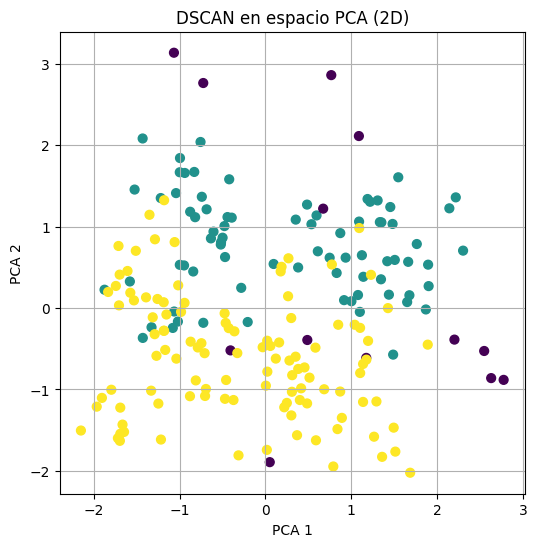

In [ ]:
X_dbscan_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (6, 6))
plt.scatter(X_dbscan_pca[:,0], X_dbscan_pca[:,1], c = etiquetas_dbscan, cmap = 'viridis', s = 40)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('DSCAN en espacio PCA (2D)')
plt.grid()
plt.show()

In [ ]:
np.random.seed(0)

data = np.random.rand(100, 4) * 100
columnas = ['Gastos_anual', 'Frecuencia_visita', 'Edad', 'Promedio_sesion']

df = pd.DataFrame(data, columns = columnas)
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
pca = PCA(n_components = 2)
componentes_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(componentes_pca, columns = ['PC_1', 'PC_2'])

print('Varianza explicada por cada componente:\n')
print(pca.explained_variance_ratio_)
print('Varianza total explicada:\n')
print(np.sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente:

[0.31745929 0.25894296]
Varianza total explicada:

0.5764022493792267


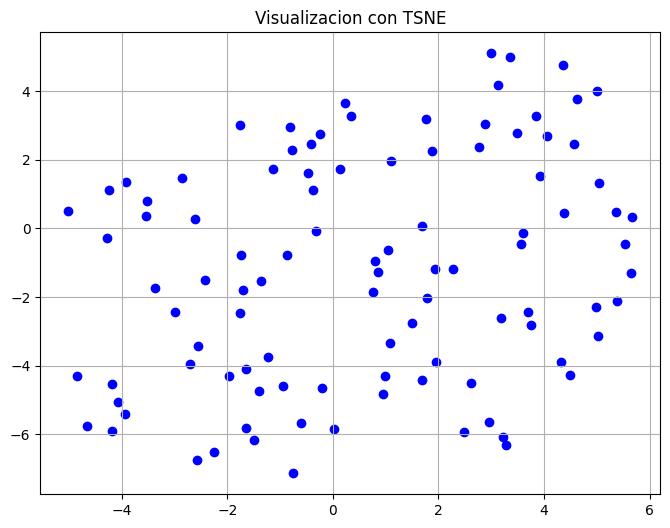

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
df_tsne = tsne.fit_transform(df_scaled)

plt.figure(figsize = (8, 6))
plt.scatter(df_tsne[:,0], df_tsne[:,1], color = 'blue')
plt.title('Visualizacion con TSNE')
plt.grid()
plt.show()

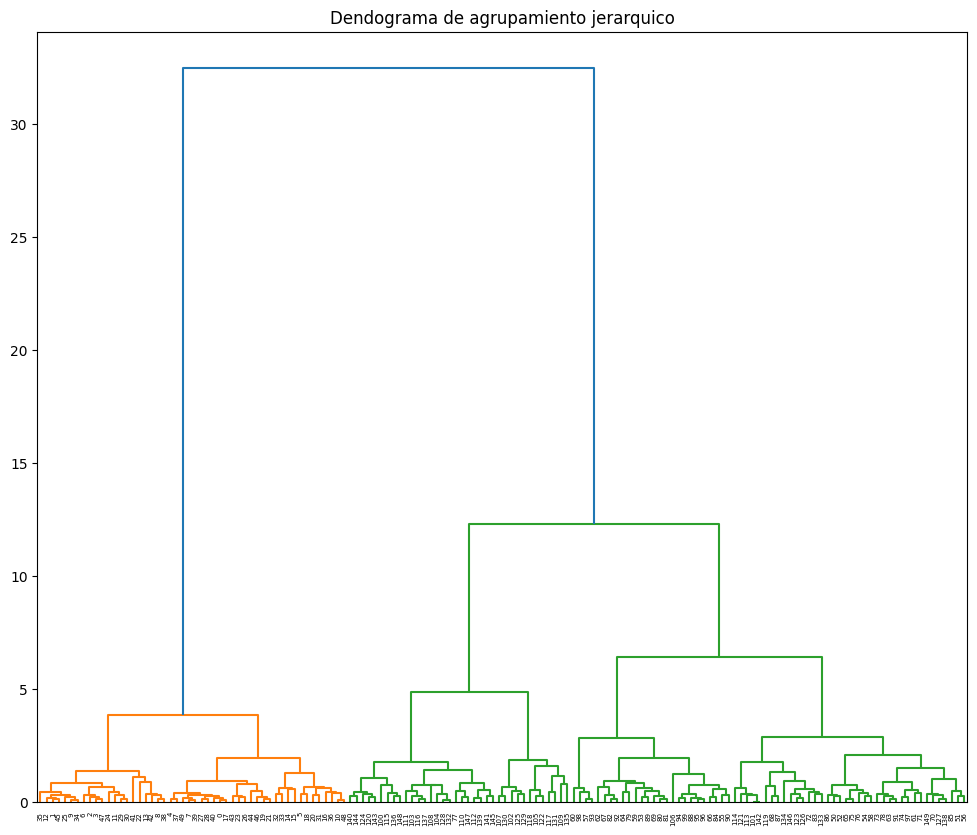

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

z = linkage(X, method = 'ward')

plt.figure(figsize = (12, 10))
dendrogram(z)
plt.title('Dendograma de agrupamiento jerarquico')
plt.show()

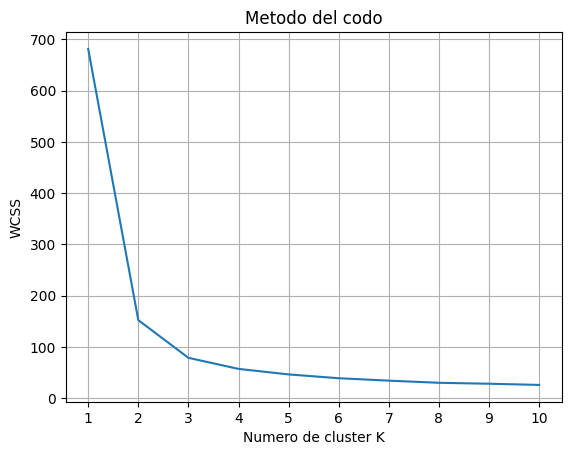

In [ ]:
wcss = []

for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, max_iter = 300, n_init = 10)
  km.fit(X)
  wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Metodo del codo')
plt.xlabel('Numero de cluster K')
plt.ylabel('WCSS')
plt.grid()
plt.show()

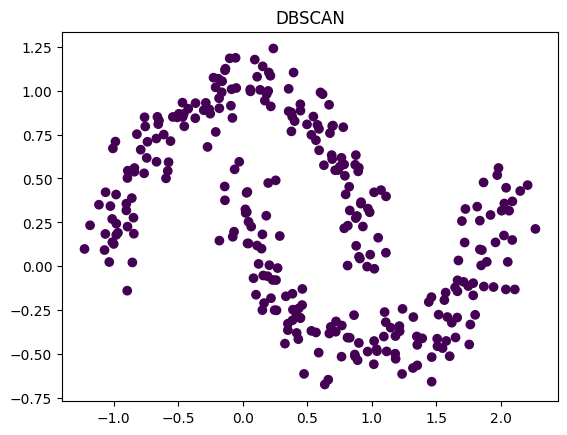

In [ ]:
from sklearn.datasets import make_moons

X, _ = make_moons(n_samples = 300, noise = 0.1, random_state = 42)

db = DBSCAN(eps = 0.3, min_samples = 5)

etiquetas_db = db.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c = etiquetas_db)
plt.title('DBSCAN')
plt.show()

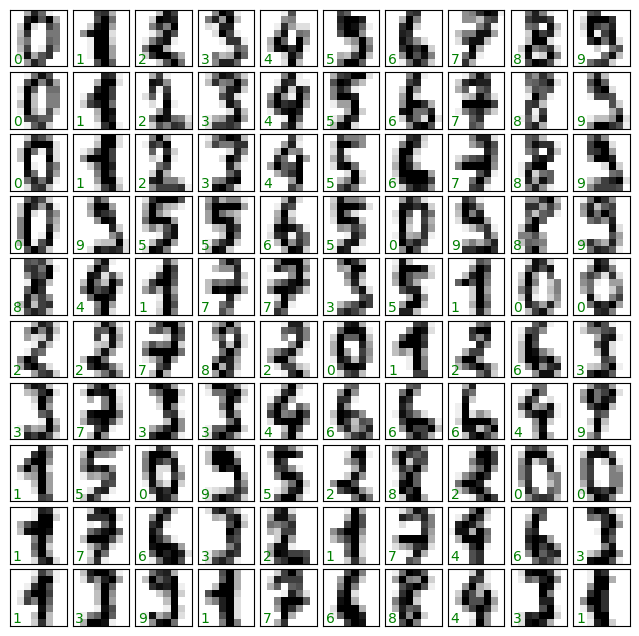

In [ ]:
from sklearn.datasets import load_digits

digitos = load_digits()
fig, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks': [], 'yticks': []}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digitos.images[i], cmap = 'binary', interpolation = 'nearest')
  ax.text(0.05, 0.05, str(digitos.target[i]), transform = ax.transAxes, color = 'green')

plt.show()

In [ ]:
print(f'Formas los datos (muestra, caracterisitcas): {digitos.data.shape}')

Formas los datos (muestra, caracterisitcas): (1797, 64)


In [ ]:
df = pd.DataFrame(digitos.data)
df['Target'] = digitos.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
pca = PCA(n_components = 2)
pca_result_2D = pca.fit_transform(digitos.data)

df['PCA1_2D'] = pca_result_2D[:,0]
df['PCA2_2D'] = pca_result_2D[:,1]

df.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,Target,PCA1_2D,PCA2_2D
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,-1.259466,-21.274883
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,7.957611,20.768699
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,6.991923,9.955986
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,-15.906105,-3.332464
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,23.306867,-4.269061


In [ ]:
pca = PCA(n_components = 3)
pca_result_3D = pca.fit_transform(digitos.data)

df['PCA1_3D'] = pca_result_3D[:,0]
df['PCA2_3D'] = pca_result_3D[:,1]
df['PCA3_3D'] = pca_result_3D[:,2]

df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,Target,PCA1_2D,PCA2_2D,PCA1_3D,PCA2_3D,PCA3_3D
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0,-1.259466,-21.274883,-1.259466,-21.274883,9.463055
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,16.0,10.0,0.0,0.0,1,7.957611,20.768699,7.957611,20.768699,-4.439506
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,11.0,16.0,9.0,0.0,2,6.991923,9.955986,6.991923,9.955986,-2.958558
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,13.0,9.0,0.0,0.0,3,-15.906105,-3.332464,-15.906105,-3.332464,-9.824372
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,16.0,4.0,0.0,0.0,4,23.306867,-4.269061,23.306867,-4.269061,5.675129


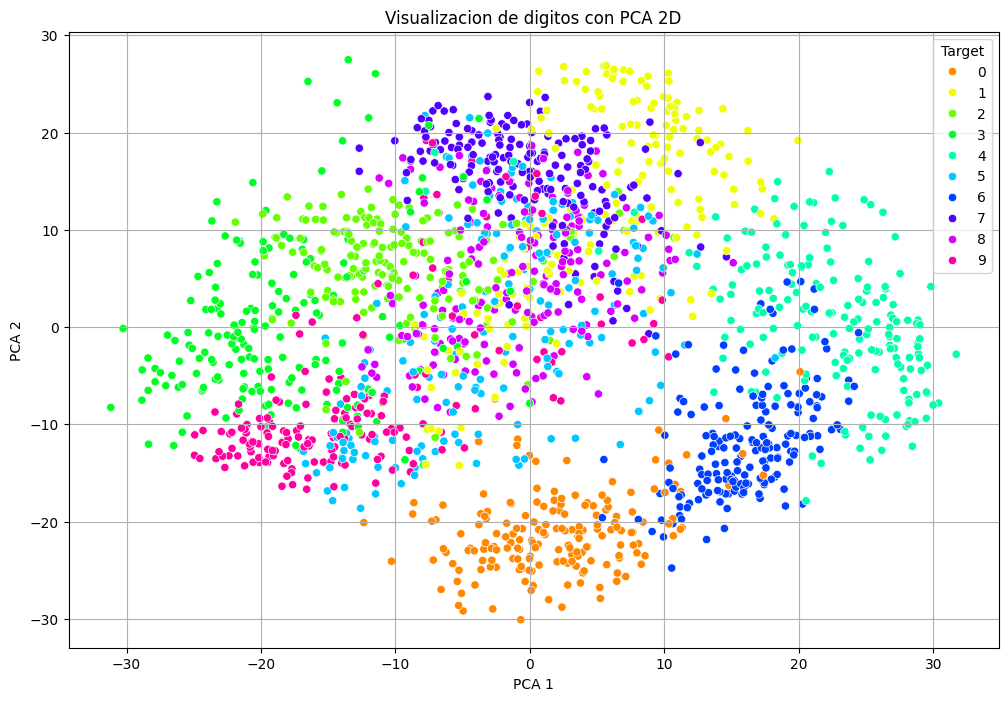

In [ ]:
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'PCA1_2D', y = 'PCA2_2D', hue = 'Target', palette = sns.color_palette('hsv', 10), legend = 'full')
plt.title('Visualizacion de digitos con PCA 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

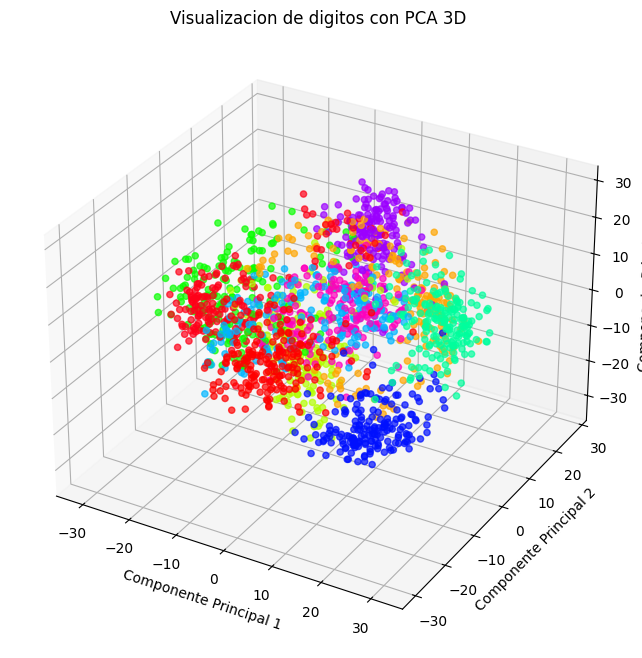

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(df['PCA1_3D'], df['PCA2_3D'], df['PCA3_3D'], c=df['Target'], cmap='hsv', alpha=0.7)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Visualizacion de digitos con PCA 3D')
plt.grid()
plt.show()

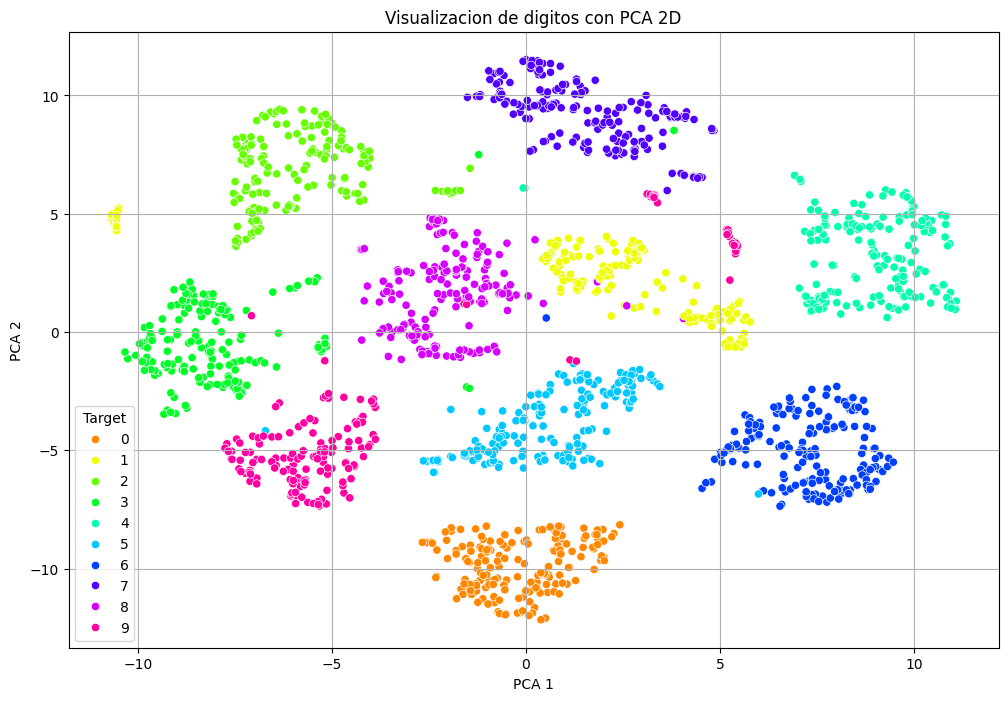

In [ ]:
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 30, max_iter = 300)
tsne_result_2D = tsne.fit_transform(digitos.data)
df['TSNE1_2D'] = tsne_result_2D[:,0]
df['TSNE2_2D'] = tsne_result_2D[:,1]

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'TSNE1_2D', y = 'TSNE2_2D', hue = 'Target', palette = sns.color_palette('hsv', 10), legend = 'full')
plt.title('Visualizacion de digitos con PCA 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [ ]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'heart.csv')

df = pd.read_csv(dataset_path)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [ ]:
cat = df.select_dtypes(exclude = ['number']).columns.to_list()

df_proce = pd.get_dummies(df, columns = cat, drop_first = True)
df_proce.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split

X = df_proce.drop(columns = ['HeartDisease'])
y = df_proce['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'Forma de conjuntos de entrenamientos: {X_train.shape} y {y_train.shape}')

Forma de conjuntos de entrenamientos: (734, 15) y (734,)


In [ ]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression(max_iter = 1000)
model_lg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

y_pred_lg = model_lg.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_lg):.2f}')
print(f'Matriz de confusion:\n {confusion_matrix(y_test, y_pred_lg)}')
print(f'Reporte de clasificacion:\n {classification_report(y_test, y_pred_lg)}')

y_pred_proba_lg = model_lg.predict_proba(X_test)[:,1]

fpr, tpr, threeholds = roc_curve(y_test, y_pred_proba_lg)
auc = roc_auc_score(y_test, y_pred_proba_lg)
print(f'AUC: {auc:.2f}')

Accuracy: 0.85
Matriz de confusion:
 [[67 10]
 [17 90]]
Reporte de clasificacion:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

AUC: 0.92


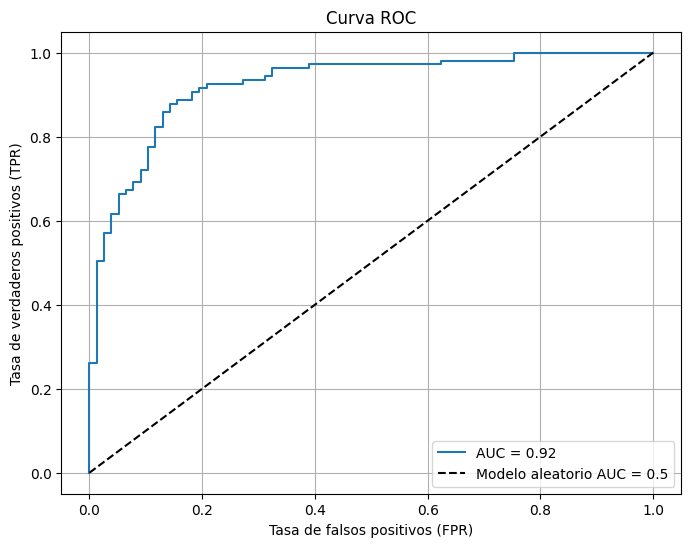

In [ ]:
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label = 'Modelo aleatorio AUC = 0.5')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc= 'lower right')
plt.grid()
plt.show()

Accuracy: 0.86
Matriz de confusion:
 [[64 13]
 [12 95]]
Reporte de clasificacion:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84        77
           1       0.88      0.89      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

AUC: 0.90


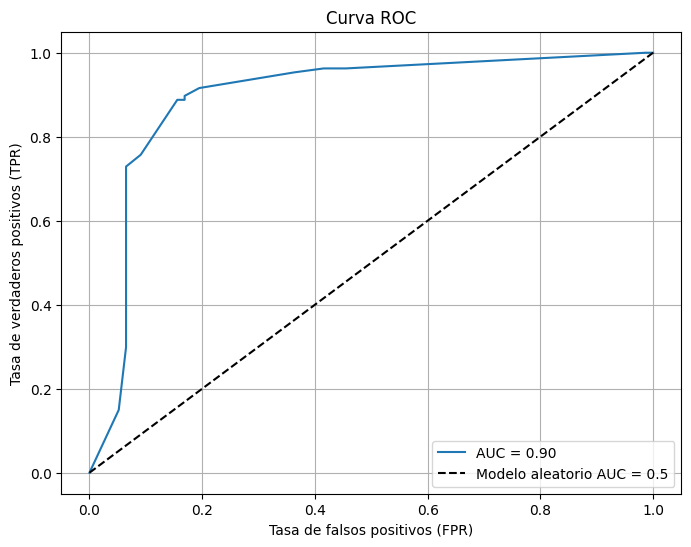

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(max_depth = 5, random_state = 42)
model_dtc.fit(X_train, y_train)

y_pred_dtc = model_dtc.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred_dtc):.2f}')
print(f'Matriz de confusion:\n {confusion_matrix(y_test, y_pred_dtc)}')
print(f'Reporte de clasificacion:\n {classification_report(y_test, y_pred_dtc)}')

y_pred_proba_dtc = model_dtc.predict_proba(X_test)[:,1]

fpr, tpr, threeholds = roc_curve(y_test, y_pred_proba_dtc)
auc = roc_auc_score(y_test, y_pred_proba_dtc)
print(f'AUC: {auc:.2f}')

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label = 'Modelo aleatorio AUC = 0.5')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc= 'lower right')
plt.grid()
plt.show()

### Ejercicio

In [25]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier #construye muchos arboles de manera secuencual y cada arbol nuevo corrige los errores del arbol anterior
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Download latest version
path = kagglehub.dataset_download("uciml/red-wine-quality-cortez-et-al-2009")

print("Path to dataset files:", path)

os.listdir(path)
dataset_path = os.path.join(path, 'winequality-red.csv')
df = pd.read_csv(dataset_path)

df.head()

Path to dataset files: /kaggle/input/red-wine-quality-cortez-et-al-2009


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [28]:
df['Buena Calidad'] = (df['quality'].apply(lambda x: 1 if x >= 7 else 0))
df['Buena Calidad'].value_counts()

,count
Buena Calidad,
0,1382
1,217


In [29]:
df = df.drop('quality', axis=1)

X = df.drop('Buena Calidad', axis=1)
y = df['Buena Calidad']

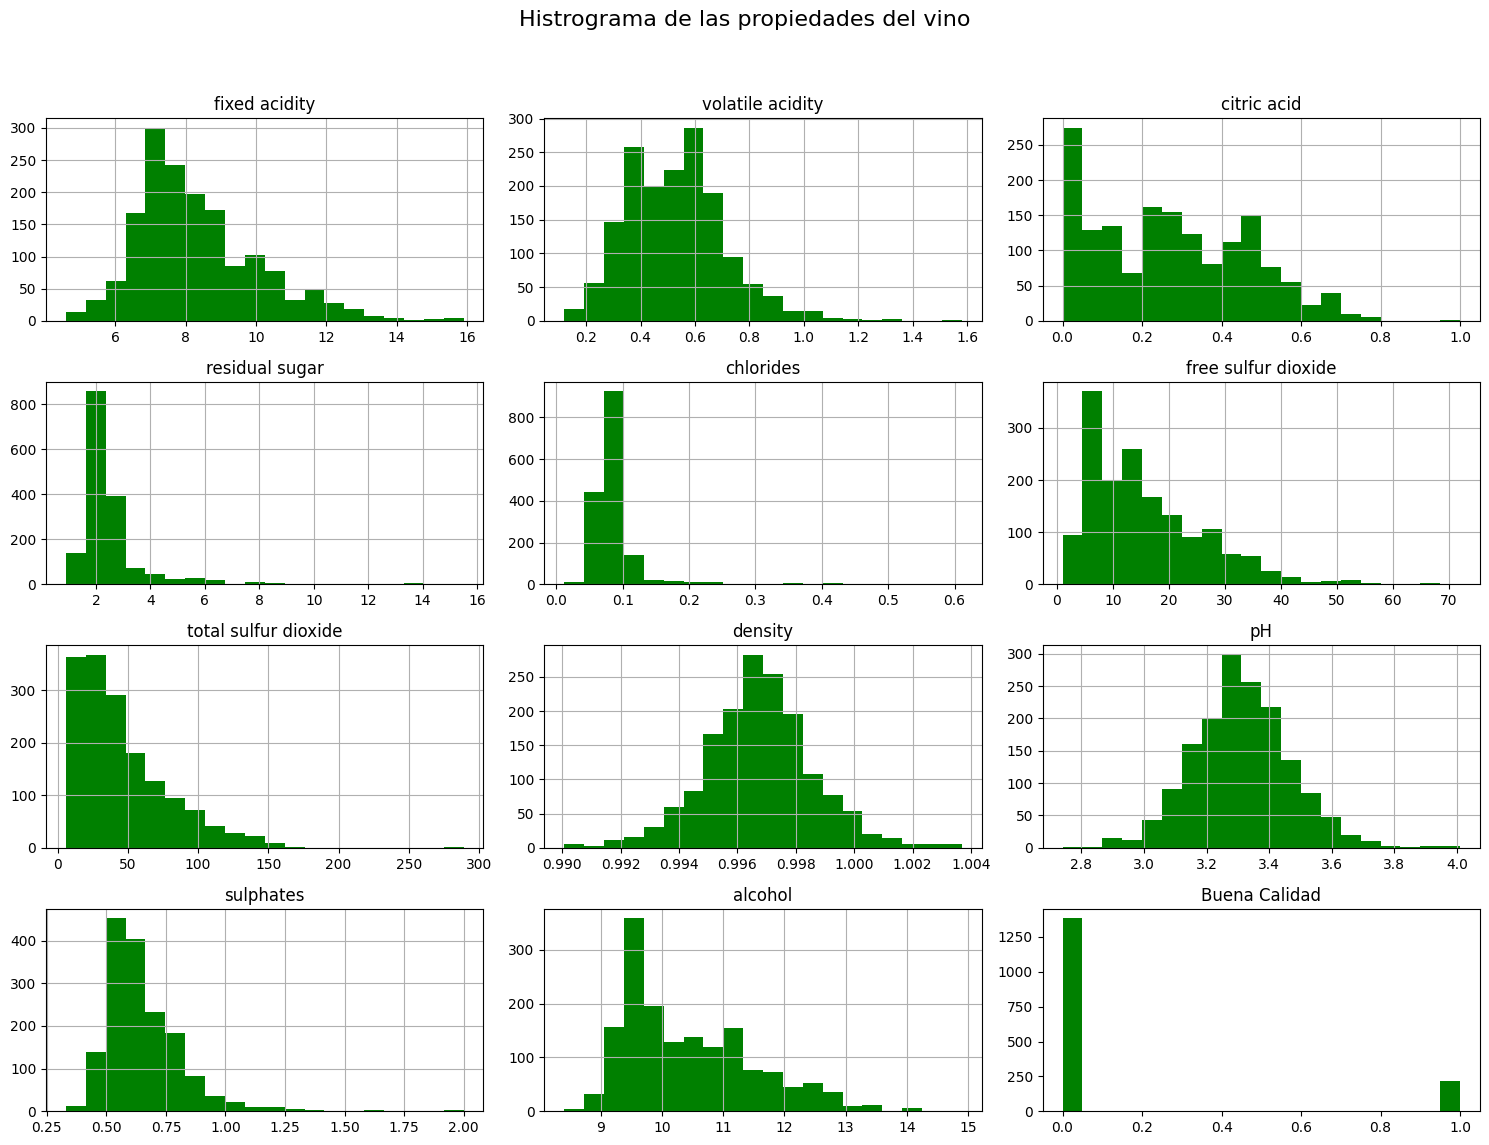

In [31]:
df.hist(bins = 20, figsize = (15, 12), color = 'green')
plt.suptitle('Histrograma de las propiedades del vino', fontsize = 16)
plt.tight_layout(rect = (0, 0.03, 1, 0.95))
plt.grid()
plt.show()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Forma del conjunto de entrenamiento: ', X_train.shape)
print('Forma del conjunto de prueba: ', X_test.shape)

Forma del conjunto de entrenamiento:  (1279, 11)
Forma del conjunto de prueba:  (320, 11)


In [37]:
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
y_pred = model_gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print('\nMatriz de confusion')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.878125

Matriz de confusion
[[261  12]
 [ 27  20]]

Classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.62      0.43      0.51        47

    accuracy                           0.88       320
   macro avg       0.77      0.69      0.72       320
weighted avg       0.86      0.88      0.87       320



In [33]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [34]:
print('Forma del conjunto de entrenamiento escalado: ', X_train_scaled.shape)
print('Forma del conjunto de prueba escalado: ', X_test_scaled.shape)

Forma del conjunto de entrenamiento escalado: (1279, 11)
Forma del conjunto de prueba escalado: (320, 11)


In [39]:
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
y_pred = model_gb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print('\nMatriz de confusion')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.878125

Matriz de confusion
[[261  12]
 [ 27  20]]

Classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
           1       0.62      0.43      0.51        47

    accuracy                           0.88       320
   macro avg       0.77      0.69      0.72       320
weighted avg       0.86      0.88      0.87       320



In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(estimator = model_gb, param_grid = param_grid, cv = 5, scoring = 'accuracy', verbose = 1)
grid.fit(X_train_scaled, y_train)

print(f'{grid.best_score_:.2f}')
grid.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
0.91


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [47]:
best_model_gb = grid.best_estimator_
y_pred = best_model_gb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print('\nMatriz de confusion')
print(confusion_matrix(y_test, y_pred))
print('\nClassification report')
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.890625

Matriz de confusion
[[260  13]
 [ 22  25]]

Classification report
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       273
           1       0.66      0.53      0.59        47

    accuracy                           0.89       320
   macro avg       0.79      0.74      0.76       320
weighted avg       0.88      0.89      0.89       320



In [48]:
import joblib

joblib.dump(best_model_gb, 'modelo_vino.pkl')
joblib.dump(ss, 'ss_vino.pkl')

['ss_vino.pkl']

In [55]:
import numpy as np

def calidad_vino():
  try:
    load_model = joblib.load('modelo_vino.pkl')
    load_scaler = joblib.load('ss_vino.pkl')

    print('Ingrese los valores de las caracteristicas quimicas del vino: ')
    col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
    input_user = []
    for col in col_names:
      value = float(input(f'Ingrese el valor de {col}: '))
      input_user.append(value)

    new_data = np.array(input_user).reshape(1, -1)
    new_data_scaled = load_scaler.transform(new_data)
    pred = load_model.predict(new_data_scaled)

    if pred[0] == 1:
      print('\nEl vino es de buena calidad.')
    else:
      print('\nEl vino es de mala calidad.')

  except FileNotFoundError:
    print('\nAsegurese de que el modelo "model_vino.pkl" y el scaler "ss_vino.pkl" existen en el directorio')
  except ValueError:
    print('\nPor favor ingrese solo valores numericos validos')

if __name__ == '__main__':
  calidad_vino()

Ingrese los valores de las caracteristicas quimicas del vino: 
Ingrese el valor de fixed acidity: 15
Ingrese el valor de volatile acidity: 1
Ingrese el valor de citric acid: 0.8
Ingrese el valor de residual sugar: 12
Ingrese el valor de chlorides: 0.03
Ingrese el valor de free sulfur dioxide: 60
Ingrese el valor de total sulfur dioxide: 8
Ingrese el valor de density: 1
Ingrese el valor de pH: 3
Ingrese el valor de sulphates: 1.2
Ingrese el valor de alcohol: 10

El vino es de buena calidad.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Ejercicio

In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 43.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/breast-cancer-wisconsin-data/versions/2


In [70]:
os.listdir(path)
dataset_path = os.path.join(path, 'data.csv')
df = pd.read_csv(dataset_path)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [67]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [71]:
df = df.drop(columns = ['id', 'Unnamed: 32'])

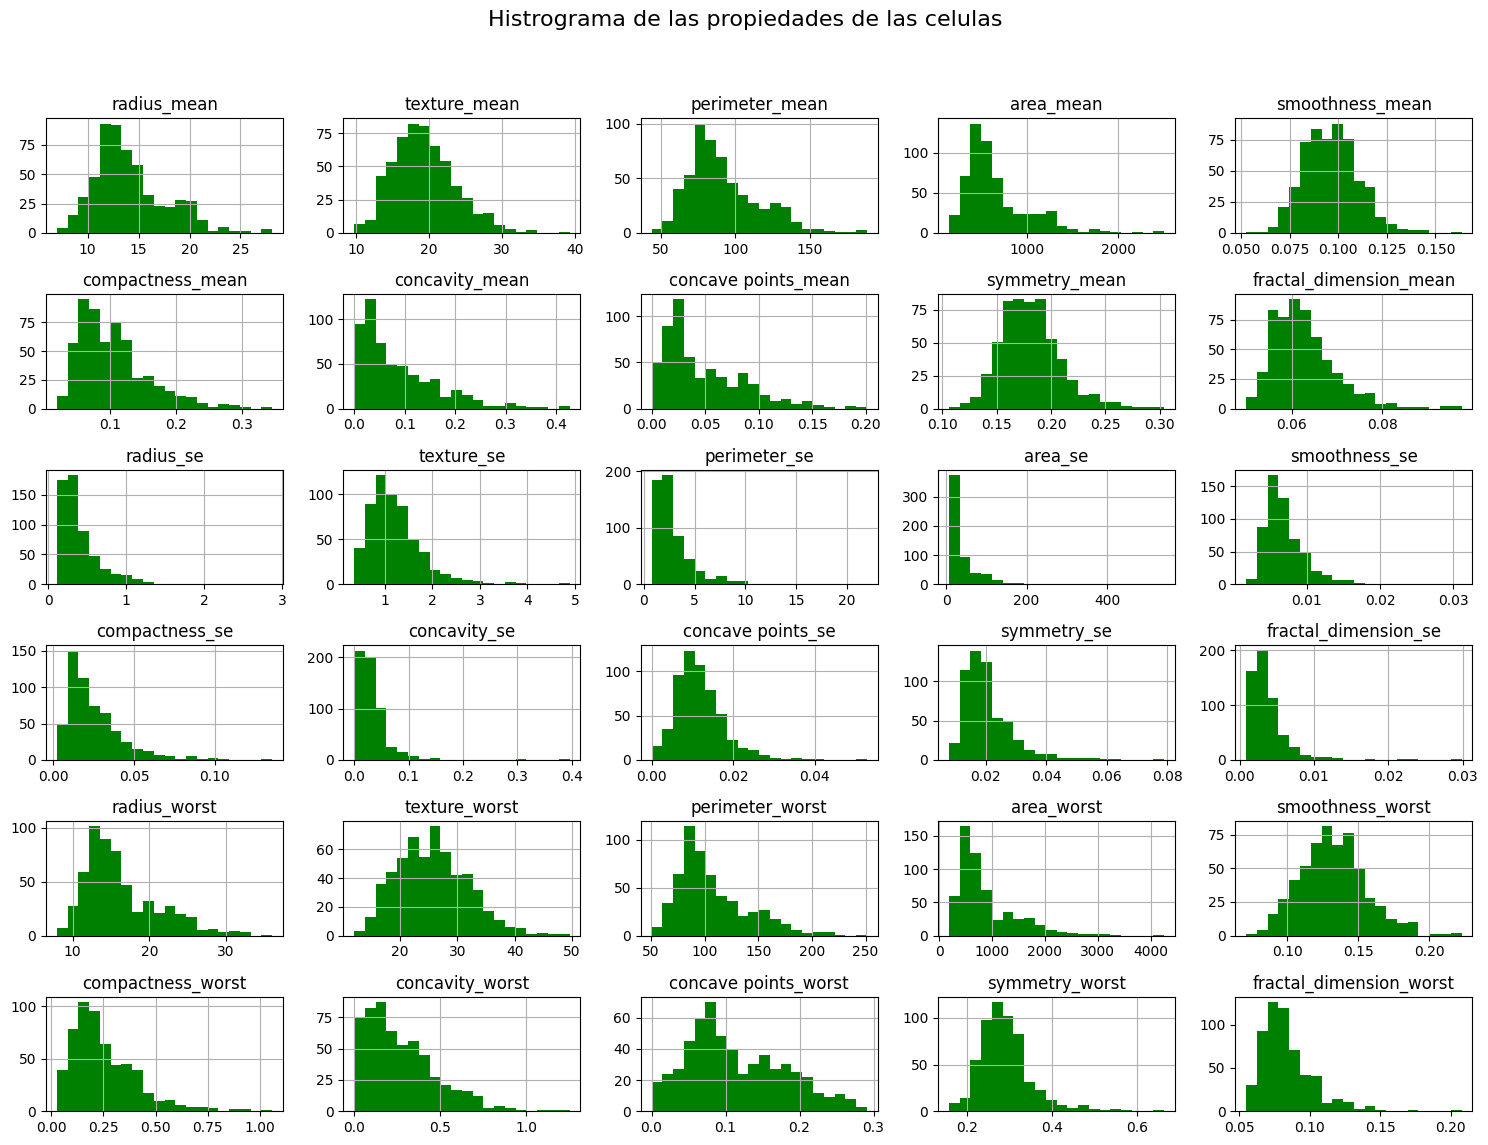

In [72]:
df.hist(bins = 20, figsize = (15, 12), color = 'green')
plt.suptitle('Histrograma de las propiedades de las celulas', fontsize = 16)
plt.tight_layout(rect = (0, 0.03, 1, 0.95))
plt.grid()
plt.show()

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['diagnosis'])

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

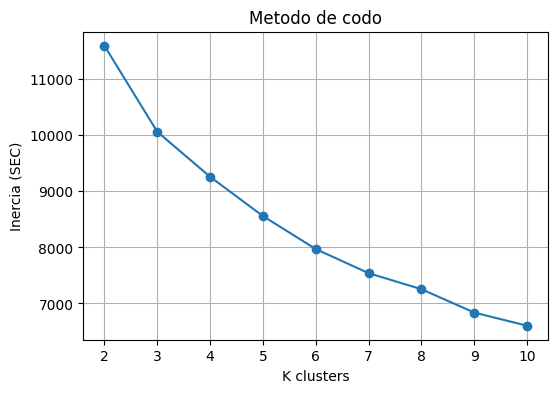

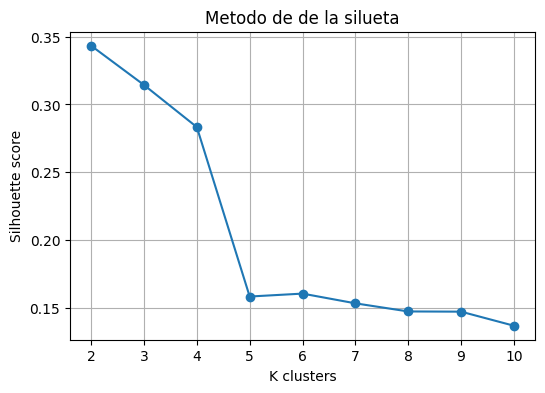

In [76]:
from sklearn.metrics import silhouette_score

inercia = []

ks = range(2, 11)

for k in ks:
  km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
  km.fit(X_scaled)
  inercia.append(km.inertia_)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), inercia, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Inercia (SEC)')
plt.title('Metodo de codo')
plt.grid()
plt.show()

silhouette_scores = []

for k in ks:
  km = KMeans(n_clusters = k, n_init = 10, random_state = 42)
  etiquetas = km.fit_predict(X_scaled)
  sil = silhouette_score(X_scaled, etiquetas)
  silhouette_scores.append(sil)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), silhouette_scores, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Silhouette score')
plt.title('Metodo de de la silueta')
plt.grid()
plt.show()

In [87]:
from ast import arg

best_k_sil = ks[int(np.argmax(silhouette_scores))]
best_k_sil, max(silhouette_scores)

k_optimo = int(best_k_sil)

km = KMeans(n_clusters = k_optimo, random_state = 42, n_init = 10)
etiquetas = km.fit_predict(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled['Cluster'] = etiquetas
centroides = km.cluster_centers_
centroides

array([[-4.82994847e-01, -2.39041417e-01, -5.00418921e-01,
        -4.78141536e-01, -3.11003504e-01, -5.26018732e-01,
        -5.79035693e-01, -5.87171167e-01, -3.09083863e-01,
        -1.49140903e-01, -4.27985139e-01, -2.11099403e-02,
        -4.30971683e-01, -4.01751491e-01, -2.38312697e-02,
        -3.70200545e-01, -3.34597601e-01, -3.97712322e-01,
        -7.49301709e-02, -2.36822308e-01, -5.17853866e-01,
        -2.51478017e-01, -5.32311435e-01, -4.99357715e-01,
        -3.16078140e-01, -4.92241206e-01, -5.36843321e-01,
        -5.80100987e-01, -3.03354969e-01, -3.36728889e-01,
        -3.10862447e-15],
       [ 9.33624060e-01,  4.62064596e-01,  9.67304616e-01,
         9.24242659e-01,  6.01166567e-01,  1.01678879e+00,
         1.11927003e+00,  1.13499581e+00,  5.97455921e-01,
         2.88287827e-01,  8.27290862e-01,  4.08052971e-02,
         8.33063820e-01,  7.76581491e-01,  4.60655986e-02,
         7.15593837e-01,  6.46773713e-01,  7.68773818e-01,
         1.44839248e-01,  4.57

In [88]:
X_scaled.shape

(569, 31)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


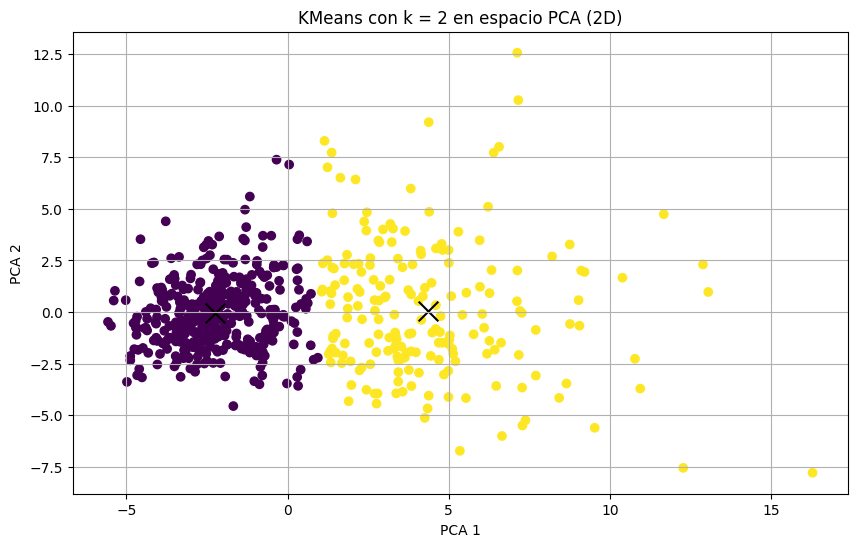

In [89]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(X_scaled)
centroides_pca = pca.transform(centroides)

plt.figure(figsize = (10, 6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c = etiquetas, cmap = 'viridis')
plt.scatter(centroides_pca[:,0], centroides_pca[:,1], marker = 'x', s = 200, color = 'black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans con k = {k_optimo} en espacio PCA (2D)')
plt.grid()
plt.show()

### Ejercicio 3

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [91]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

os.listdir(path)
dataset_path = os.path.join(path, 'data.csv')
df = pd.read_csv(dataset_path)

df.head()

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [94]:
X = df.drop(columns = ['id', 'diagnosis', 'Unnamed: 32'])

ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled[:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

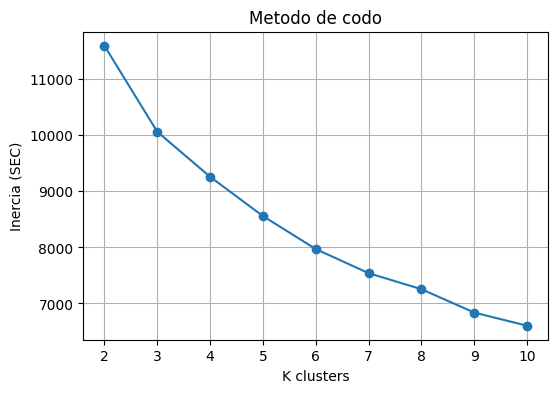

In [95]:
inercia = []

ks = range(2, 11)

for k in ks:
  km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
  km.fit(X_scaled)
  inercia.append(km.inertia_)

plt.figure(figsize = (6, 4))
plt.plot(list(ks), inercia, marker = 'o')
plt.xlabel('K clusters')
plt.ylabel('Inercia (SEC)')
plt.title('Metodo de codo')
plt.grid()
plt.show()

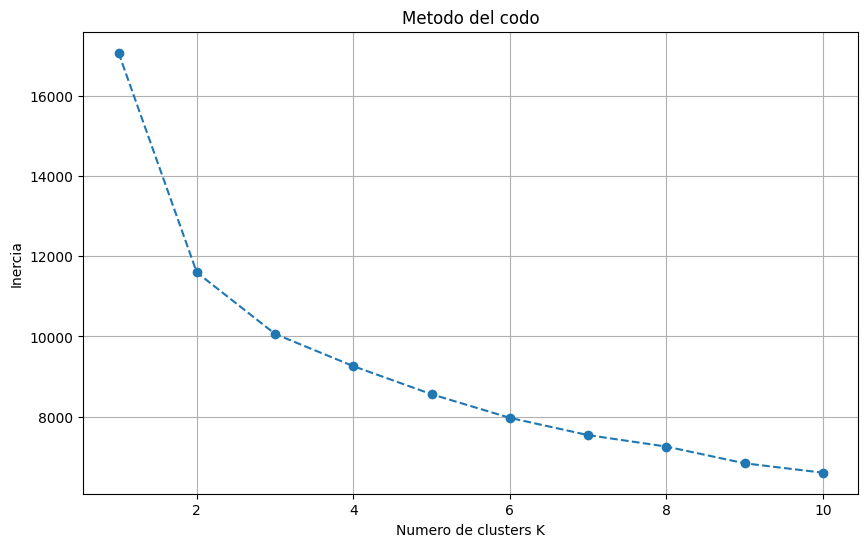

In [97]:
inercia = []

for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 10)
  km.fit(X_scaled)
  inercia.append(km.inertia_)

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), inercia, marker = 'o', linestyle = '--')
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters K')
plt.ylabel('Inercia')
plt.grid()
plt.show()

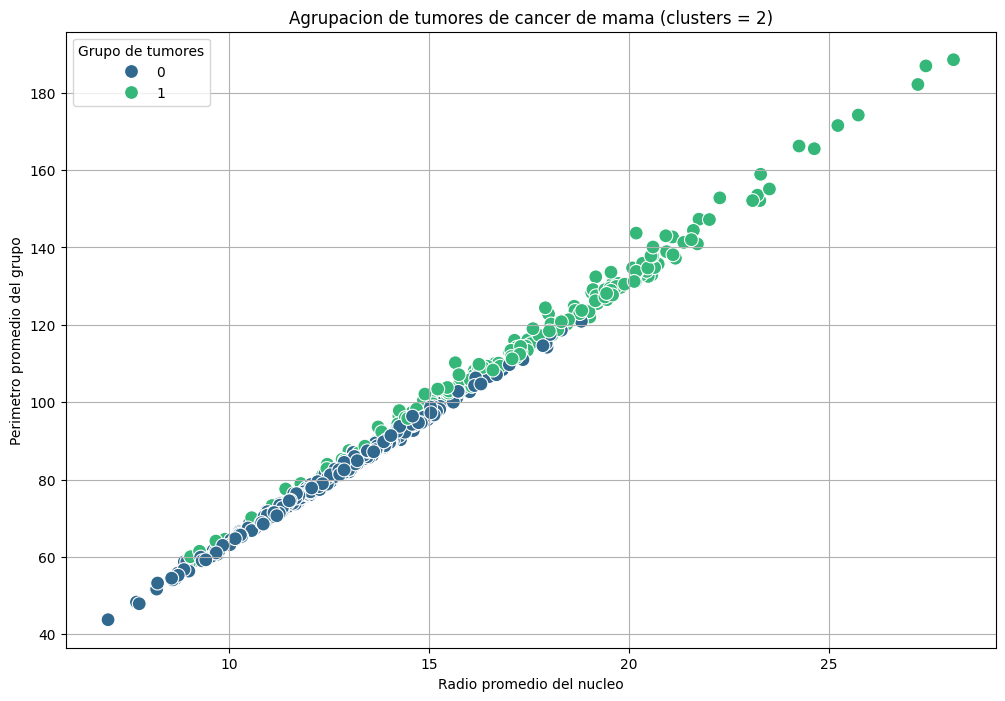

In [99]:
k_optimo = 2

km = KMeans(n_clusters = k_optimo, init = 'k-means++', n_init = 10, random_state = 42)
clusters = km.fit_predict(X_scaled)
df['Clusters'] = clusters

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = 'radius_mean', y = 'perimeter_mean', hue = 'Clusters', palette = 'viridis', s = 100)
plt.title('Agrupacion de tumores de cancer de mama (clusters = 2)')
plt.xlabel('Radio promedio del nucleo')
plt.ylabel('Perimetro promedio del grupo')
plt.legend(title = 'Grupo de tumores')
plt.grid()
plt.show()

In [100]:
cluster_resumen = df.groupby('Clusters')[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].mean()
cluster_resumen

,radius_mean,texture_mean,perimeter_mean,area_mean
Clusters,,,,
0,12.426691,18.262427,79.820053,486.772267
1,17.414536,21.275258,115.452887,979.857216


In [101]:
df['Diagnosis_num'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [102]:
tabla_contingencia = pd.crosstab(df['Clusters'], df['Diagnosis_num'])
tabla_contingencia

Diagnosis_num,0,1
Clusters,,
0,339,36
1,18,176
